Displaying SIFT Keypoints for Image 1


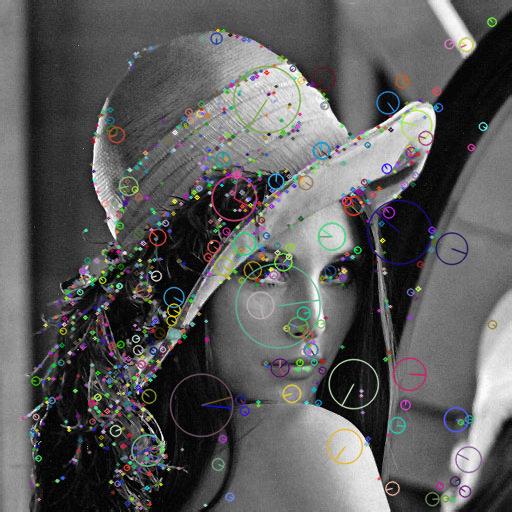

Displaying SIFT Keypoints for Image 2


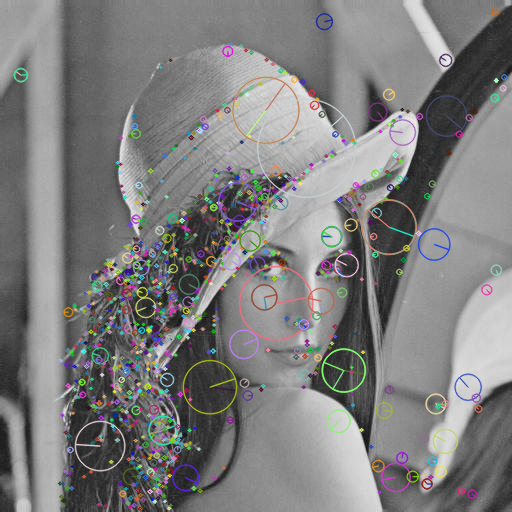

Displaying Feature Matching using ORB and BFMatcher


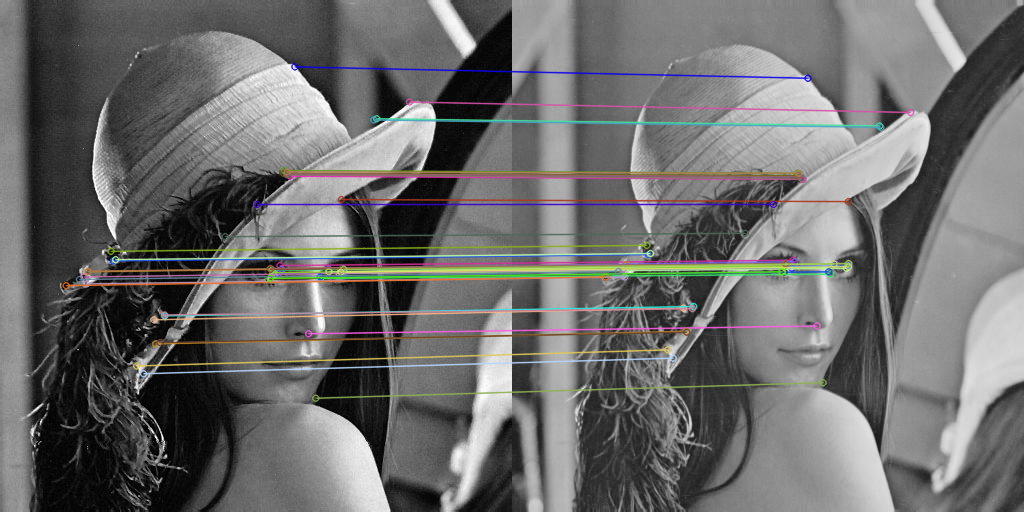

Displaying Contour Detection Result


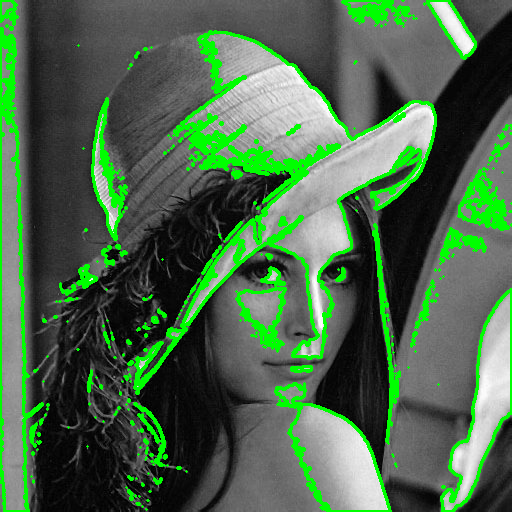

Processing completed!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

print("Displaying SIFT Keypoints for Image 1")
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

img_sift1 = cv2.drawKeypoints(img1, keypoints_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_sift2 = cv2.drawKeypoints(img2, keypoints_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img_sift1)
print("Displaying SIFT Keypoints for Image 2")
cv2_imshow(img_sift2)

print("Displaying Feature Matching using ORB and BFMatcher")
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(matched_img)

print("Displaying Contour Detection Result")
img_contour = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img_contour, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 2)

cv2_imshow(img_contour)

print("Processing completed!")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training InceptionNet-V3...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 680s 427ms/step - accuracy: 0.5150 - loss: 1.3960 - val_accuracy: 0.6101 - val_loss: 1.1169
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 665s 426ms/step - accuracy: 0.6460 - loss: 1.0121 - val_accuracy: 0.6227 - val_loss: 1.0827
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 638s 398ms/step - accuracy: 0.6854 - loss: 0.8944 - val_accuracy: 0.6231 - val_loss: 1.1022
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 662s 423ms/step - accuracy: 0.7207 - loss: 0.7904 - val_accuracy: 0.6252 - val_loss: 1.1118
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 682s 423ms/step - accuracy: 0.7589 - loss: 0.6932 - val_accuracy: 0.6200 - val_loss: 1.1564


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Training GAN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/5, D Loss Real: 0.6870958805084229, D Loss Fake: 0.6914143562316895, GAN Loss: 0.7138351202011108
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 2/5, D Loss Real: 0.6921107172966003, D Loss Fake: 0.6928947567939758, GAN Loss: 0.7068712115287781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 3/5, D Loss Real: 0.6899029016494751, D Loss Fake: 0.6902638077735901, GAN Loss: 0.698000431060791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Epoch 4/5, D Loss Real: 0.6921814680099487, D Loss Fake: 0.6931049227714539, GAN Loss: 0.6930962204933167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 5/5, D Loss Real: 0.6947188973426819, D Loss Fake: 0.6958144903182983, GAN Loss: 0.6870598793029785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


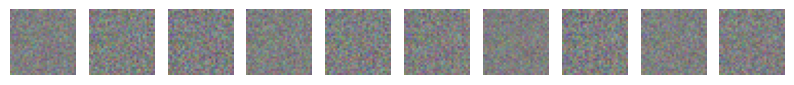

Training Completed!


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
out_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out_layer)
for layer in base_model.layers:
    layer.trainable = False  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x_train_resized = tf.image.resize(x_train, (75, 75))
x_test_resized = tf.image.resize(x_test, (75, 75))

print("Training InceptionNet-V3...")
model.fit(x_train_resized, y_train, validation_data=(x_test_resized, y_test), epochs=5, batch_size=32)

from tensorflow.keras.layers import Input, Reshape, Conv2DTranspose, Conv2D, LeakyReLU, Dropout, BatchNormalization


def build_generator():
    model = Sequential([
        Dense(256, input_dim=100, activation='relu'),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dense(32 * 32 * 3, activation='tanh'),
        Reshape((32, 32, 3))
    ])
    return model

generator = build_generator()


def build_discriminator():
    model = Sequential([
        Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(32,32,3)),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Conv2D(128, (3,3), strides=(2,2), padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False

gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


print("Training GAN...")
num_epochs = 5
batch_size = 32
half_batch = batch_size // 2

gan_losses = []

for epoch in range(num_epochs):
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_imgs = x_train[idx]
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_imgs = generator.predict(noise)

    real_labels = np.ones((half_batch, 1))
    fake_labels = np.zeros((half_batch, 1))

    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)

    noise = np.random.normal(0, 1, (batch_size, 100))
    gan_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    gan_losses.append(gan_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, D Loss Real: {d_loss_real[0]}, D Loss Fake: {d_loss_fake[0]}, GAN Loss: {gan_loss}")

noise = np.random.normal(0, 1, (10, 100))
generated_images = generator.predict(noise)

generated_images = (generated_images + 1) / 2.0  # Normalize for display

fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
    axes[i].imshow(generated_images[i])
    axes[i].axis('off')
plt.show()

print("Training Completed!")